In [1]:
 # Don't forget to do : pip install -e.

In [2]:
import os
from dotenv import load_dotenv
from frame2text4llm.framer import VideoReader, SubtitleRegionDetector, display_frames
from frame2text4llm.ocr import OCRManager

load_dotenv()


True

# Load 

In [3]:
video_path = "../sandbox/sample_short.mp4"
reader = VideoReader(video_path, engine="opencv",)
reader.print_info()

2025-04-16 23:57:42.438 | INFO     | frame2text4llm.framer.video:print_info:96 - Video information for sample_short.mp4:


2025-04-16 23:57:42.441 | INFO     | frame2text4llm.framer.video:print_info:97 -   - Dimensions: 720x900
2025-04-16 23:57:42.442 | INFO     | frame2text4llm.framer.video:print_info:98 -   - FPS: 30.00
2025-04-16 23:57:42.444 | INFO     | frame2text4llm.framer.video:print_info:99 -   - Total frames 📸 : 7667
2025-04-16 23:57:42.445 | INFO     | frame2text4llm.framer.video:print_info:100 -   - Duration: 255.57 seconds
2025-04-16 23:57:42.446 | INFO     | frame2text4llm.framer.video:print_info:101 -   - Time per frame: 0.0333 seconds
2025-04-16 23:57:42.447 | INFO     | frame2text4llm.framer.video:print_info:102 -   - Engine: opencv


# Extract

In [4]:
video_path = "../sandbox/sample_short.mp4"
reader = VideoReader(video_path, engine="opencv",)
reader.print_info()

frames = reader.extract_frames(target_fps=1, max_frames=-1)

2025-04-16 23:57:42.483 | INFO     | frame2text4llm.framer.video:print_info:96 - Video information for sample_short.mp4:
2025-04-16 23:57:42.484 | INFO     | frame2text4llm.framer.video:print_info:97 -   - Dimensions: 720x900
2025-04-16 23:57:42.485 | INFO     | frame2text4llm.framer.video:print_info:98 -   - FPS: 30.00


2025-04-16 23:57:42.487 | INFO     | frame2text4llm.framer.video:print_info:99 -   - Total frames 📸 : 7667
2025-04-16 23:57:42.491 | INFO     | frame2text4llm.framer.video:print_info:100 -   - Duration: 255.57 seconds
2025-04-16 23:57:42.494 | INFO     | frame2text4llm.framer.video:print_info:101 -   - Time per frame: 0.0333 seconds
2025-04-16 23:57:42.496 | INFO     | frame2text4llm.framer.video:print_info:102 -   - Engine: opencv
2025-04-16 23:57:42.500 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:202 - Extracting frames with OpenCV: sample_short.mp4
2025-04-16 23:57:42.529 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:217 - 💡 Extracting 255 frames from 7667 total frames at 1 FPS
2025-04-16 23:57:43.550 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 10 frames...
2025-04-16 23:57:44.581 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:242 - Extracted 20 frames...
2025-04-16 23:57:45.510 | INFO     | f

# Visualiasize

2025-04-16 23:58:04.351 | INFO     | frame2text4llm.framer.plot:display_frames:39 - 5


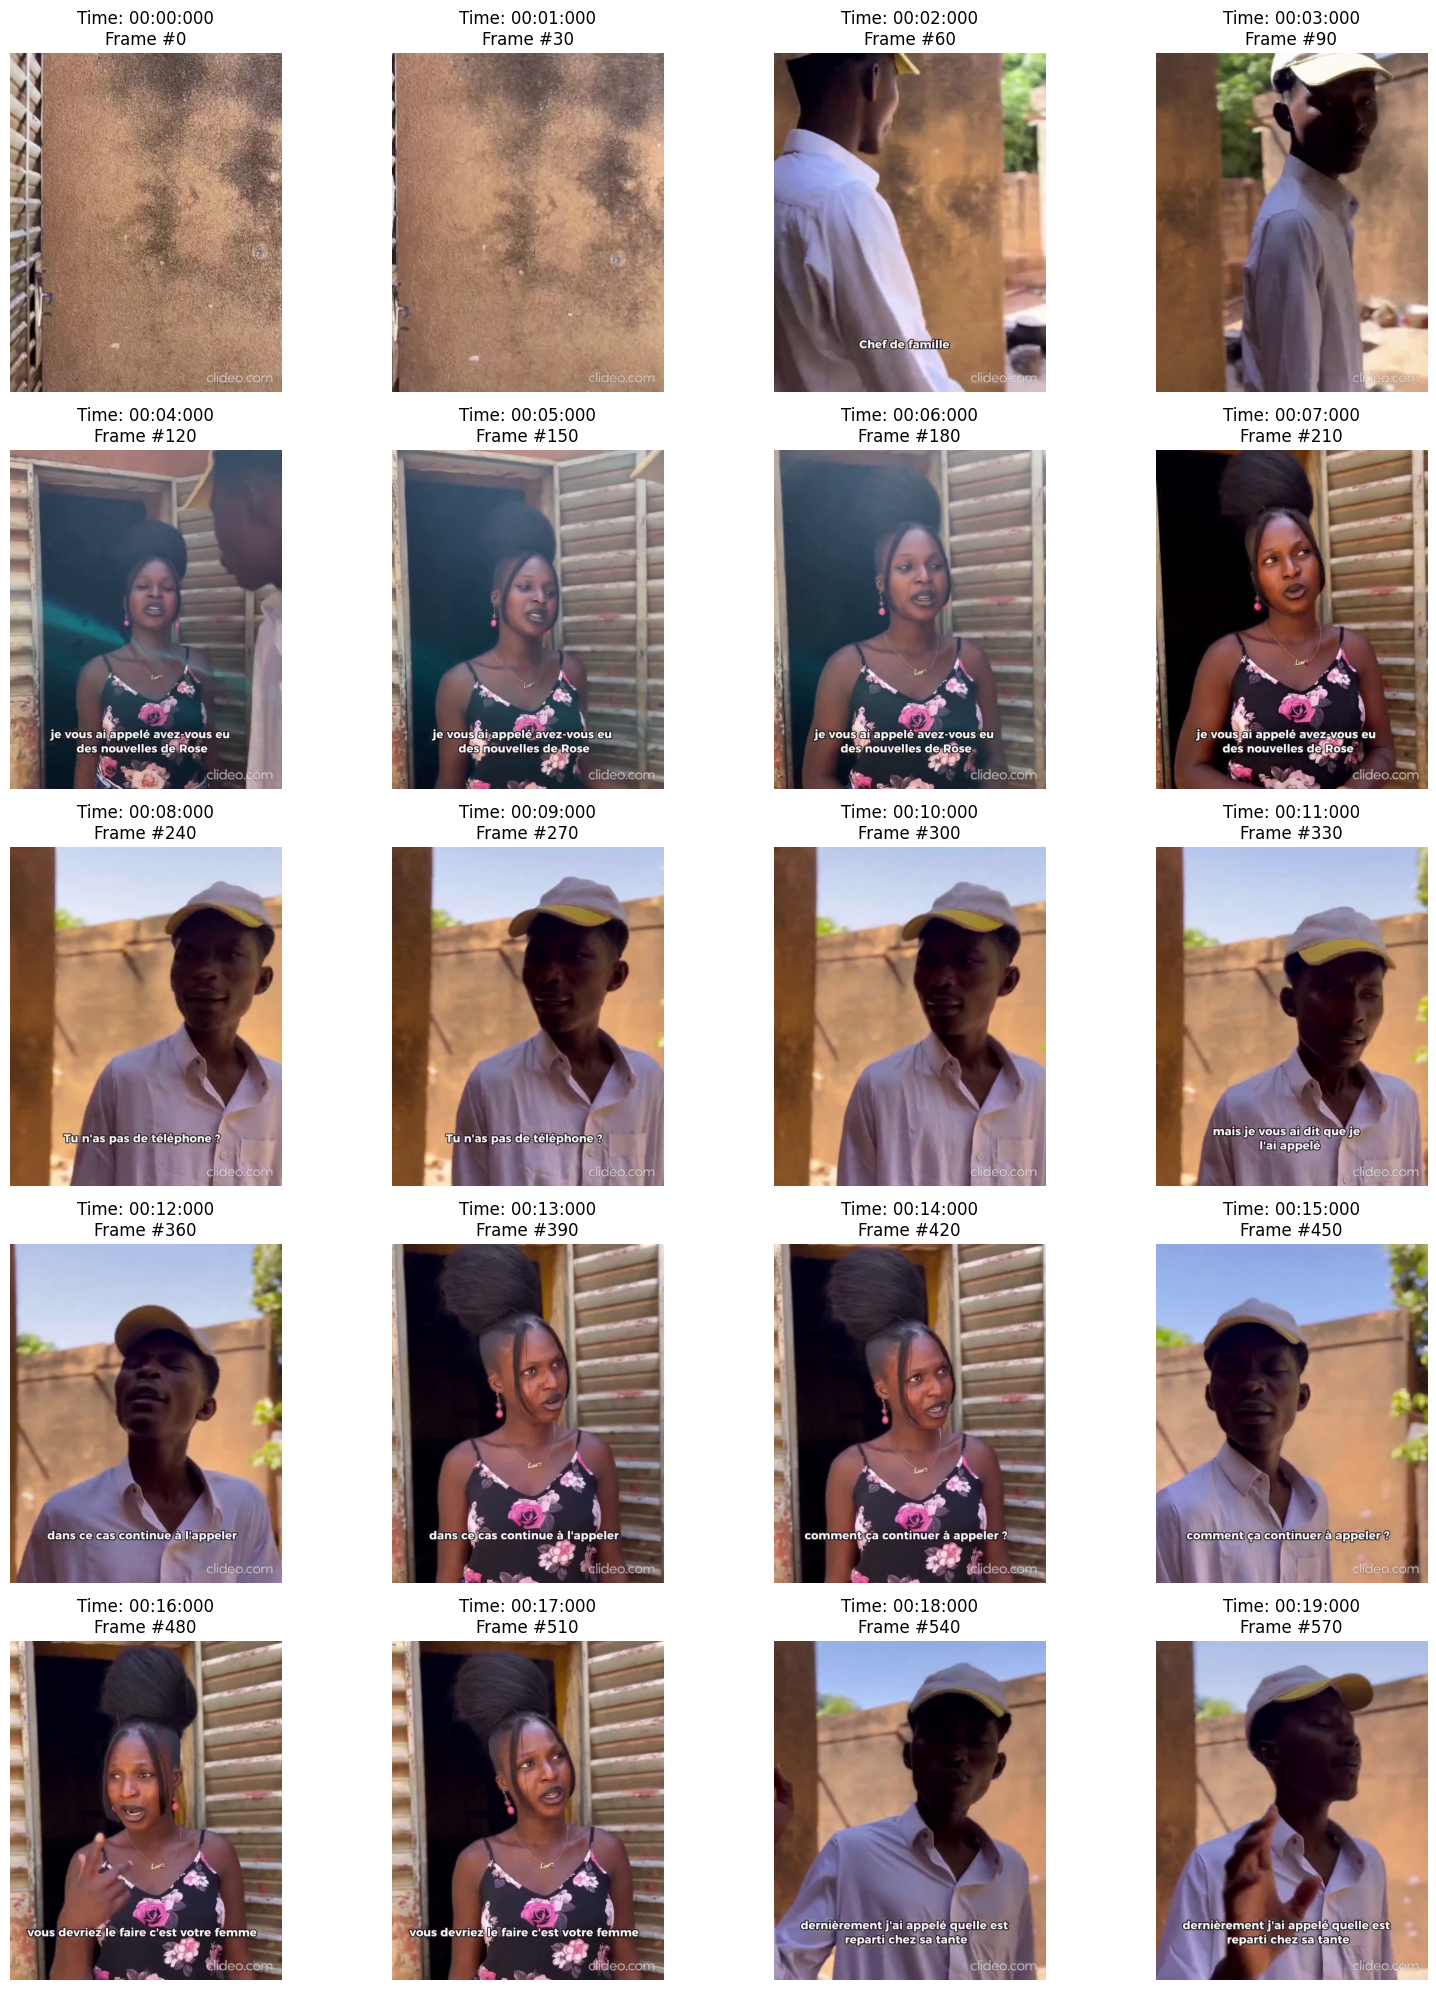

In [5]:
display_frames(frames, max_samples=20)

#  Subtitle detection

2025-04-16 23:58:07.205 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-16 23:58:07.207 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-16 23:58:07.921 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


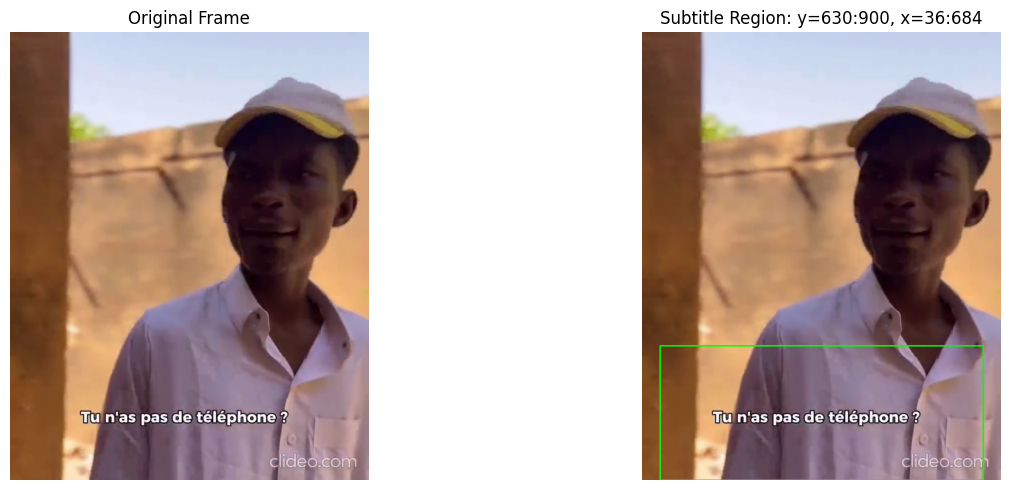

In [6]:
detector = SubtitleRegionDetector(reader)
subtitle_region = detector.detect_region()
images = [frame.image for frame in frames] 
detector.visualize_region(subtitle_region, images ,frame_index=8)

# OCR

In [7]:
from frame2text4llm.ocr import OCRManager


MISTRAL_API_KEY = os.getenv("MISTRAL_API_KEY")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
ocr_manager = OCRManager(reader)

## 1. Pytessarct

# PaddleOCR

In [8]:
extracted_text = ocr_manager.process( image=images[8], tool="paddleocr", lang="fr")
print(extracted_text)

c:\Users\sawal\.virtualenvs\venv_frame2text\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
2025-04-16 23:58:13.574 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-16 23:58:13.575 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-16 23:58:14.119 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


[2025/04/16 23:58:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\sawal/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\sawal/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48,

In [9]:
extracted_text = ocr_manager.process( image=images[8], tool="tesseract", lang="fra")
print(extracted_text)

2025-04-16 23:58:17.448 | INFO     | frame2text4llm.ocr.tools.tesseract:_configure_tesseract:21 - 🔍 Trying to find tesseract in system PATH
2025-04-16 23:58:17.458 | INFO     | frame2text4llm.ocr.tools.tesseract:_configure_tesseract:40 - ✅ Tesseract found at fallback Windows path: C:\Program Files\Tesseract-OCR\tesseract.exe
2025-04-16 23:58:17.537 | INFO     | frame2text4llm.ocr.tools.tesseract:get_available_languages:52 - 📚 Available Tesseract languages: ['afr', 'amh', 'ara', 'asm', 'aze', 'aze_cyrl', 'bel', 'ben', 'bod', 'bos', 'bre', 'bul', 'cat', 'ceb', 'ces', 'chi_sim', 'chi_sim_vert', 'chi_tra', 'chi_tra_vert', 'chr', 'cos', 'cym', 'dan', 'deu', 'deu_latf', 'div', 'dzo', 'ell', 'eng', 'enm', 'epo', 'equ', 'est', 'eus', 'fao', 'fas', 'fil', 'fin', 'fra', 'frm', 'fry', 'gla', 'gle', 'glg', 'grc', 'guj', 'hat', 'heb', 'hin', 'hrv', 'hun', 'hye', 'iku', 'ind', 'isl', 'ita', 'ita_old', 'jav', 'jpn', 'jpn_vert', 'kan', 'kat', 'kat_old', 'kaz', 'khm', 'kir', 'kmr', 'kor', 'lao', 'lat',

Muin'as pas detéléphone!? |
\ ©


# LLM as services

# OPENAI GTPT4o

In [11]:
result = ocr_manager.process(image=images[8], tool="openai",api_key=OPENAI_API_KEY)
print(result)

2025-04-16 23:58:18.467 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-16 23:58:18.470 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-16 23:58:19.028 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


Tu n'as pas de téléphone ?


# Mistral

In [13]:
text_mistral = ocr_manager.process(image=images[8],
    tool="mistral",
    api_key=MISTRAL_API_KEY
)
print(text_mistral)

2025-04-17 00:01:45.411 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-04-17 00:01:45.413 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-04-17 00:01:46.348 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684


# Tu n'as pas de téléphone?
